In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [27]:

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [28]:
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(60000, 28, 28)

In [29]:
X_test.shape

(10000, 28, 28)

5

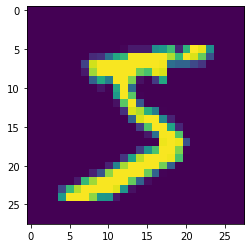

In [30]:
plt.imshow(X_train[0])
y_train[0]

In [31]:

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape

(60000, 784)

In [32]:
model = keras.Sequential()

In [33]:
model.add(keras.layers.Dense(100, input_shape =(784,), activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4536 - accuracy: 0.8726
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1342 - accuracy: 0.9608
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0898 - accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0656 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0321 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0260 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0214 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.017

In [34]:
model.evaluate(X_test_flattened, y_test)
y_predicted = model.predict(X_test_flattened)
predout     = np.argmax(y_predicted,axis=1)
predout

313/313 [==============================] - 0s 1ms/step - loss: 0.0832 - accuracy: 0.9765


array([7, 2, 1, ..., 4, 5, 6])

In [35]:
conf_matrix = tf.math.confusion_matrix(y_test,predout)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    0,    1,    3,    0,    2,    1,    3,    0],
       [   0, 1127,    3,    1,    0,    0,    2,    0,    2,    0],
       [   1,    0, 1010,    4,    7,    0,    1,    5,    2,    2],
       [   0,    1,    5,  983,    0,    8,    0,    3,    3,    7],
       [   0,    0,    3,    0,  968,    0,    3,    0,    1,    7],
       [   2,    2,    0,    5,    2,  872,    3,    0,    4,    2],
       [   5,    3,    3,    1,    8,    7,  928,    0,    3,    0],
       [   0,    7,   13,    3,    4,    1,    0,  986,    2,   12],
       [   4,    0,    9,    9,    6,    3,    2,    1,  935,    5],
       [   1,    3,    0,    3,    9,    1,    0,    5,    0,  987]],
      dtype=int32)>